<a href="https://colab.research.google.com/github/0x6f736f646f/Emojidetection/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
print(os.listdir("."))

Using TensorFlow backend.


['.config', 'Emojidetection', 'sample_data']


In [2]:
!git clone https://github.com/0x6f736f646f/Emojidetection.git

fatal: destination path 'Emojidetection' already exists and is not an empty directory.


In [0]:
import os
os.chdir("Emojidetection")

In [3]:
os.listdir()

['Working_data',
 'Data',
 'README.md',
 'Models',
 'LICENSE',
 '.git',
 '.gitignore',
 'requirements.txt',
 'Emojidetection',
 'Notebook.ipynb',
 'Human_data',
 'faces.py',
 'getting_emoji_data.py',
 'folder.py']

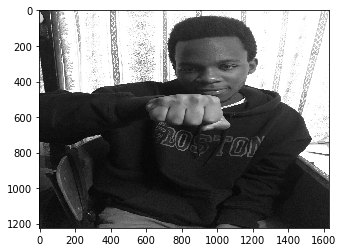

In [4]:
main_dir = "."
train_dir = "Human_data"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    new= os.path.join(path, p)
    for img in os.listdir(new):
        img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
        plt.imshow(new_img_array, cmap="gray")
        break

In [0]:
X = []
y = []
def create_test_data(path):
    for p in os.listdir(path):
        new= os.path.join(path, p)
        category = p.split("_")[0]
        for img in os.listdir(new):
            img_array = cv2.imread(os.path.join(new, img), cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(1632, 1224))
            X.append(new_img_array)
            y.append(category.replace("-", " ").lower())

In [6]:
new_img_array.shape

(1224, 1632)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1,1632, 1224, 1)
y = np.array(y)

In [8]:
X.shape

(104, 1632, 1224, 1)

In [13]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation="relu", input_shape=(1632, 1224, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1630, 1222, 64)    640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 815, 611, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 813, 609, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 406, 304, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 404, 302, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 202, 151, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1952128)           0         
__________

In [0]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import keras
from keras.utils import to_categorical

In [11]:
encoder = LabelEncoder()
encoder.fit(y)
small = encoder.transform(y)
small

array([ 0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  2,  2,  2,  2,  2, 19, 19,
       19, 19, 19, 12, 12, 12, 12, 12,  1,  1,  1,  1,  1, 16, 16, 16, 16,
       16, 14, 14, 14, 14, 14,  7,  7,  7,  7,  7, 17, 17, 17, 17, 17,  3,
        3,  3,  3,  3,  6,  6,  6,  6,  6, 11, 11, 11, 11,  9,  9,  9,  9,
        9, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20,  4,  4,  4,  4,  4, 18,
       18, 18, 18, 18, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13,  8,  8,  8,
        8,  8])

In [14]:
model.fit(X, small, epochs=5, batch_size=2, validation_split=0.2)

Train on 83 samples, validate on 21 samples
Epoch 1/5
83/83 [==============================] - 16s 197ms/step - loss: nan - acc: 0.0602 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/5
83/83 [==============================] - 11s 132ms/step - loss: nan - acc: 0.0602 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/5
83/83 [==============================] - 11s 133ms/step - loss: nan - acc: 0.0602 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/5
83/83 [==============================] - 11s 133ms/step - loss: nan - acc: 0.0602 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/5
83/83 [==============================] - 11s 133ms/step - loss: nan - acc: 0.0602 - val_loss: nan - val_acc: 0.0000e+00
